# Twitter Hate Speech Detection

### Problem Statement:
The term hate speech is understood as any type of verbal, written or behavioural communication that attacks or uses derogatory or discriminatory language against a person or group based on what they are, in other words, based on their religion, ethnicity, nationality, race, colour, ancestry, sex or another identity factor. In this problem, we will take you through a hate speech detection model with Machine Learning and Python.</br>

Hate Speech Detection is generally a task of sentiment classification. So, for training, a model that can classify hate speech from a certain piece of text can be achieved by training it on a data that is generally used to classify sentiments. So, for the task of hate speech detection model, we will use the Twitter tweets to identify tweets containing Hate speech.</br>

Our goal is to classify tweets into two categories, hate speech or non-hate speech. Our project analyzed a dataset CSV file from Kaggle containing 31,962 tweets. 


## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import string
from nltk.text import Text

## Import Data

In [3]:
df = pd.read_csv('dataset/twitter_hate_speech.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


## Data Information

### Number of observations and features in the dataset

In [4]:
print("Number of observations: ", df.shape[0])
print("Number of features: ", df.shape[1])

Number of observations:  31962
Number of features:  3


### Features in the dataset

In [5]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

### Data type

In [6]:
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

### Data Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


### Data size

In [8]:
df.size

95886

### Predictors and Target Attributes

In [9]:
# Predictors attributes
text = df.iloc[:, 1:]
text.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [10]:
# Target attributes
label = df.iloc[:, 0:1]
label.head()

,id
0,1
1,2
2,3
3,4
4,5


### Checking missing values

In [11]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Visualize the distribution of target attribute for each class

In [12]:
# Label feature for each class
hate_speech = df[df['label'] == 1].shape[0]
free_speech = df[df['label'] == 0].shape[0]
print('Hate speech: ',hate_speech)
print('Free Speech: ',free_speech)

Hate speech:  2242
Free Speech:  29720


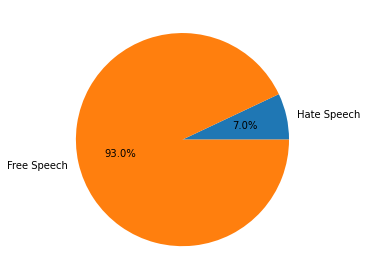

In [13]:
# Visualize Label class
speech = [hate_speech, free_speech]
label = ["Hate Speech", "Free Speech"]

plt.pie(speech , labels = label, autopct= '%1.1f%%')
plt.tight_layout()
plt.show()

## Data Preprocessing

In the data preprocessing text will be clean with the help of Regular Expression and then using preprocessing operations Tokenization, to convert sentence into token. After tokenization stop words will be removed and then apply stemming to reducing a word to its word stem.

### Text Cleaning

<b> 1. Lower case
    
<b> 2. Remove Punctuation
    
<b> 3. Remove Urls
    
<b> 4. Removing @tags
    
<b> 5. Remove Special Characters

### 1. Lower case

In [14]:
def lower_case(text):
    return text.lower()

df['tweet'] = df['tweet'].apply(lower_case)

### 2. Remove Punctuation

In [15]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['tweet'] = df['tweet'].apply(remove_punct)

### 3. Remove URL

In [16]:
def remove_url(text):
    return re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

df['tweet'] = df['tweet'].apply(remove_url)


### 4. Remove @tags

In [17]:
def remove_tags(text):
    return re.sub(r'(@[A-Za-z0-9]+)',"",text)

df['tweet'] = df['tweet'].apply(remove_tags)

### 5. Remove Special Characters

In [18]:
def remove_special_char(text):
    return " ".join(e for e in text.split() if e.isalnum())

df['tweet'] = df['tweet'].apply(remove_special_char)

## Preprocessing Operations

<b>
    
1. Tokenizing
    

2. Removing stop words
    

3. Lammetization
    

5. Word Count

<b>1. Tokenizing

In [19]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [20]:
def tokenize(text):
    return word_tokenize(text)

df['tweet'] = df['tweet'].apply(tokenize)
df.tweet.head()

0    [user, when, a, father, is, dysfunctional, and...
1    [user, user, thanks, for, lyft, credit, i, can...
2                              [bihday, your, majesty]
3    [model, i, love, u, take, with, u, all, the, t...
4               [factsguide, society, now, motivation]
Name: tweet, dtype: object

<b>2. Removing stopwords

In [21]:
from nltk.corpus import stopwords

In [22]:
def remove_stopwords(text):
    text = [i for i in text if not i in stopwords.words('english')]
    return text

df['tweet'] = df['tweet'].apply(remove_stopwords)
df.tweet.head()

0    [user, father, dysfunctional, selfish, drags, ...
1    [user, user, thanks, lyft, credit, cant, use, ...
2                                    [bihday, majesty]
3                      [model, love, u, take, u, time]
4                    [factsguide, society, motivation]
Name: tweet, dtype: object

<b> 3. Lammatization

In [23]:
from nltk.stem import WordNetLemmatizer

In [24]:
def lammatize(text):
    word_lem = WordNetLemmatizer()
    text = [word_lem.lemmatize(token) for token in text]
    return text
    
df['tweet'] = df['tweet'].apply(lammatize)
df.tweet.head()

0    [user, father, dysfunctional, selfish, drag, k...
1    [user, user, thanks, lyft, credit, cant, use, ...
2                                    [bihday, majesty]
3                      [model, love, u, take, u, time]
4                    [factsguide, society, motivation]
Name: tweet, dtype: object

In [ ]:
#import nltk
#nltk.download('wordnet')

In [25]:
from wordcloud import WordCloud, STOPWORDS

In [26]:
#pip install wordcloud

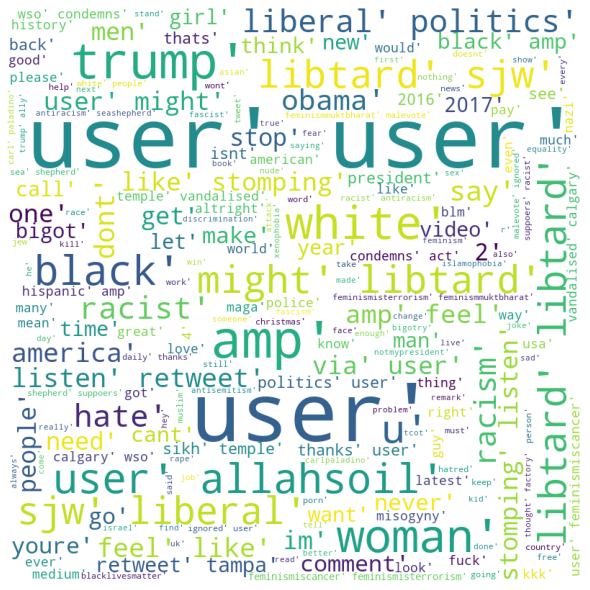

In [27]:
#WordCloud of Hate speech
hate_speech = df[df['label'] == 1]
comment_words = ''
stopwords = set(STOPWORDS)
for val in hate_speech.tweet:
    
    #typecast each value to string
    val = str(val)
    
    #split the value
    tokens = val.split()
    
    #convert each token into lower case
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800,
                     background_color =  'white', 
                     stopwords = stopwords,
                     min_font_size = 10).generate(comment_words)

#plot the word cloud image
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()
        

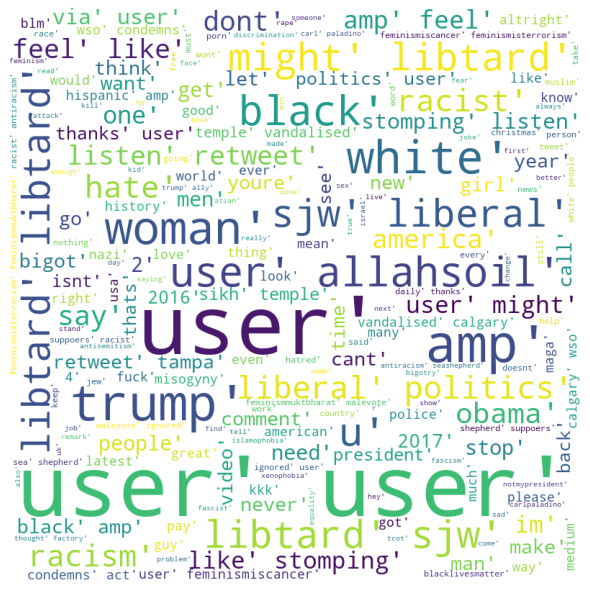

In [28]:
#WordCloud of Hate speech
free_speech = df[df['label'] == 0]
comment_words = ''
stopwords = set(STOPWORDS)
for val in hate_speech.tweet:
    
    #typecast each value to string
    val = str(val)
    
    #split the value
    tokens = val.split()
    
    #convert each token into lower case
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800,
                     background_color =  'white', 
                     stopwords = stopwords,
                     min_font_size = 10).generate(comment_words)

#plot the word cloud image
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()
        

## Feature Extraction

### TF-IDF Model

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
#init the TF IDF model and take 2000 most frequent words from dictionaries
vectorizer = TfidfVectorizer(max_features = 2000)

In [31]:
#replace the list inside# tweet column which was created during tokenization
list_to_str = []
for list in df['tweet']:
    list_to_str.append(' '.join(map(str,list)))

df['tweet'] = list_to_str
df['tweet'].head()

0    user father dysfunctional selfish drag kid dys...
1    user user thanks lyft credit cant use cause do...
2                                       bihday majesty
3                             model love u take u time
4                        factsguide society motivation
Name: tweet, dtype: object

In [32]:
# fit corpus data into TF IDF model
corpus = df['tweet']
text = vectorizer.fit_transform(corpus).toarray()
text

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
text.shape

(31962, 2000)

# Split the dataset

In [34]:
from sklearn.model_selection import train_test_split

## Split the dataset into train and test

In [35]:
label = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(text, label, test_size = 0.2, random_state = 0)

## Training Data

In [36]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)

X_train:  (25569, 2000)
y_train:  (25569,)


## Testing Data

In [38]:
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

X_test:  (6393, 2000)
y_test:  (6393,)


# Build the model using LSTM

## Convolution Neural Network with Long Short Term Memory 

In [39]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Bidirectional, TimeDistributed, Conv1D, ZeroPadding1D, GRU
from tensorflow.keras.layers import Lambda, Input, Dropout, Masking, BatchNormalization, Activation, Embedding
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import plot_model

## Build the model

In [40]:
# LSTM
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape), activation='relu', return_sequences=True))
model.add(Dropout(0.2)) 
model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 25569, 128)        1090048   
                                                                 
 dropout (Dropout)           (None, 25569, 128)        0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                3

## Compile the model

In [42]:
opt = Adam(lr=0.001, decay=1e-6)

C:\Users\AMRAPALI\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [43]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

## Fit the training data 

In [44]:
print(model.input_shape)

(None, 25569, 2000)


In [46]:
model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

## Predict the train and test

In [47]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Create and Visualize Confusion Matrix

In [48]:
# Create the Confusion Matrix
confusion_matrix_list = confusion_matrix(y_test, y_pred_test)

In [49]:
confusion_matrix_list

array([[5761,  158],
       [  17, 5952]], dtype=int64)

<AxesSubplot:>

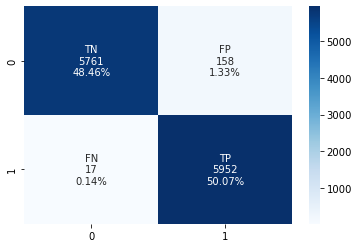

In [50]:
#[row, column]
TP = confusion_matrix_list[1,1]
TN = confusion_matrix_list[0,0]
FP = confusion_matrix_list[0,1]
FN = confusion_matrix_list[1,0]

# Visualize the Matrix
matrix_names = ['TN','FP','FN','TP']
matrix_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_list.flatten()]
matrix_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_list.flatten()/np.sum(confusion_matrix_list)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(matrix_names,matrix_counts,matrix_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix_list, annot=labels, fmt='', cmap='Blues')

# Evaluate score

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

In [52]:
# Accuracy Score
Accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy Score:', Accuracy) 

# Precision Score
Precision = precision_score(y_test, y_pred_test)
print('Precision Score:', Precision)   

# True positive Rate (TPR) or Sensitivity or Recall
TPR = recall_score(y_test, y_pred_test)
print('True positive Rate:', TPR)             

# False positive Rate (FPR)
FPR = FP / float(TN + FP)
print('False positive Rate', FPR)                       

# F1 Score or F-Measure or F-Score
F1 = f1_score(y_test, y_pred_test)
print('F1 Score:', F1)                 

# Specificity
Specificity = TN / (TN + FP)
print('Specificity:', Specificity )                    

# Mean Absolute Error
Error = mean_absolute_error(y_test, y_pred_test)
print('Mean Absolute Error:', Error)   

# ROC Area
Roc = roc_auc_score(y_test, y_pred_test)
print('ROC Area:', Roc) 

Accuracy Score: 0.9852792732166891
Precision Score: 0.9741407528641571
True positive Rate: 0.997151951750712
False positive Rate 0.02669369825984119
F1 Score: 0.9855120456991473
Specificity: 0.9733063017401589
Mean Absolute Error: 0.014720726783310902
ROC Area: 0.9852291267454355


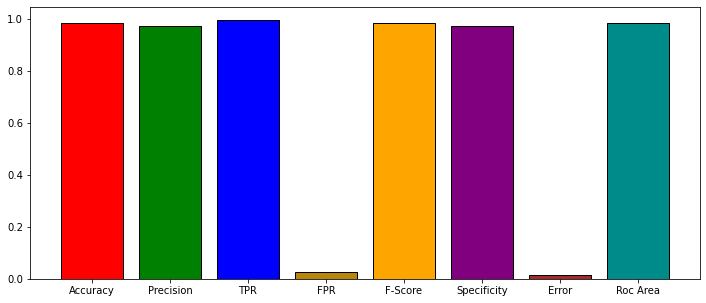

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 5))

result = [Accuracy, Precision, TPR, FPR, F1, Specificity, Error, Roc]
label = ["Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error", "Roc Area"]
colors=[ 'red', 'green', 'blue', 'darkgoldenrod', 'orange', 'purple', 'brown', 'darkcyan']

plt.bar(label, result, color = colors, edgecolor='black')
plt.show()

# Make a new Prediction

## Save TFID Vectorizer and LSTM Model

### Import pickel

In [54]:
import pickle 

### Save Vectorizer

In [56]:
tf_idf = open("cv.pkl", 'wb')
pickle.dump(vectorizer, tf_idf)
tf_idf.close()

### Save the model

In [57]:
lstm = open("model.pkl", 'wb')
pickle.dump(model, lstm)
lstm.close()

## Load Vectorizer and model

In [58]:
cv = open("cv.pkl", 'rb')
cv = pickle.load(cv)
cv 

TfidfVectorizer(max_features=2000)

## Load the model

In [59]:
model = open("model.pkl", "rb")
model = pickle.load(model)